จำลองไดร์ฟของ google drive

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


นำเข้าไลบราลี่ที่จำเป็น

In [0]:
from skimage.color import rgb2gray
import numpy as np
import cv2
import matplotlib.pyplot as plt
%matplotlib inline
from scipy import ndimage

ตั้งค่าพาร์ทของรูปภาพ

In [0]:
impath = "/content/drive/My Drive/ku-csc/Digital Image Processing/Project/chair2.jpg"

**Region-based Segmentation**

นำเข้ารูปและพล็อต

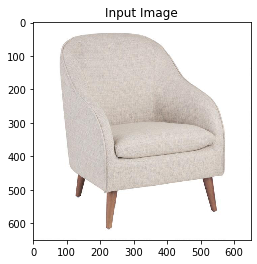

In [0]:
image = plt.imread(impath)
image.shape
plt.title("Input Image")
plt.imshow(image)

เปลี่ยนเป็น grayscale

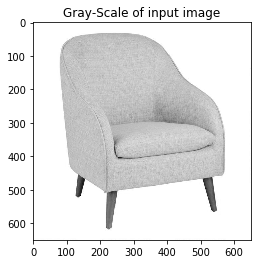

In [0]:
gray = rgb2gray(image)
plt.title("Gray-Scale of input image")
plt.imshow(gray, cmap='gray')

ทำ global threshold

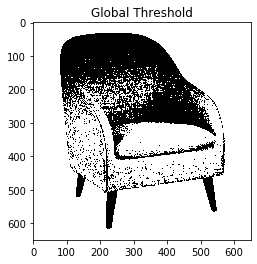

In [0]:
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.title("Global Threshold")
plt.imshow(gray, cmap='gray')

ทำ locale threshold

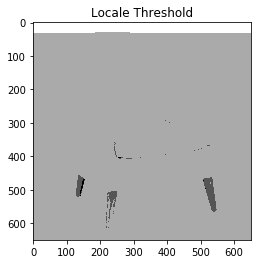

In [0]:
gray = rgb2gray(image)
gray_r = gray.reshape(gray.shape[0]*gray.shape[1])
for i in range(gray_r.shape[0]):
    if gray_r[i] > gray_r.mean():
        gray_r[i] = 3
    elif gray_r[i] > 0.5:
        gray_r[i] = 2
    elif gray_r[i] > 0.25:
        gray_r[i] = 1
    else:
        gray_r[i] = 0
gray = gray_r.reshape(gray.shape[0],gray.shape[1])
plt.title("Locale Threshold")
plt.imshow(gray, cmap='gray')

**Edge Detection Segmentation**

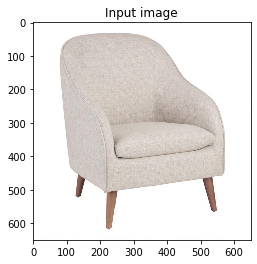

In [0]:
image = plt.imread(impath)
plt.title("Input image")
plt.imshow(image)

**Sobel Operation**

In [0]:
# converting to grayscale
gray = rgb2gray(image)

# defining the sobel filters
sobel_horizontal = np.array([np.array([1, 2, 1]), np.array([0, 0, 0]), np.array([-1, -2, -1])])
print(sobel_horizontal, '\nThis is a kernel for detecting horizontal edges\n')
 
sobel_vertical = np.array([np.array([-1, 0, 1]), np.array([-2, 0, 2]), np.array([-1, 0, 1])])
print(sobel_vertical, '\nThis is a kernel for detecting vertical edges\n')

[[ 1  2  1]
 [ 0  0  0]
 [-1 -2 -1]] 
This is a kernel for detecting horizontal edges

[[-1  0  1]
 [-2  0  2]
 [-1  0  1]] 
This is a kernel for detecting vertical edges



In [0]:
out_h = ndimage.convolve(gray, sobel_horizontal, mode='reflect')
out_v = ndimage.convolve(gray, sobel_vertical, mode='reflect')
# here mode determines how the input array is extended when the filter overlaps a border.

Text(0.5, 1.0, 'Result of sobel horizontal')

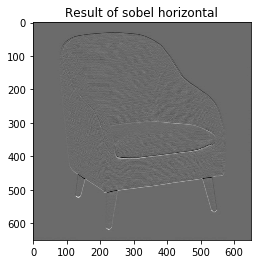

In [0]:
plt.imshow(out_h, cmap='gray')
plt.title("Result of sobel horizontal")

Text(0.5, 1.0, 'Result of sobel virtical')

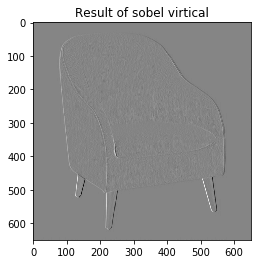

In [0]:
plt.imshow(out_v, cmap='gray')
plt.title("Result of sobel virtical")

**Lapacian Operation**

In [0]:
kernel_laplace = np.array([np.array([1, 1, 1]), np.array([1, -8, 1]), np.array([1, 1, 1])])
print(kernel_laplace, '\nThis is a laplacian kernel\n')

[[ 1  1  1]
 [ 1 -8  1]
 [ 1  1  1]] 
This is a laplacian kernel



Text(0.5, 1.0, 'The result of lapacian operation')

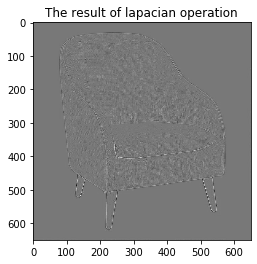

In [0]:
out_l = ndimage.convolve(gray, kernel_laplace, mode='reflect')
plt.imshow(out_l, cmap='gray')
plt.title("The result of lapacian operation")

**Image Segmentation based on Clustering(K-MEAN)**

using scikitlearn module

(650, 650, 3)


Text(0.5, 1.0, 'Input Image')

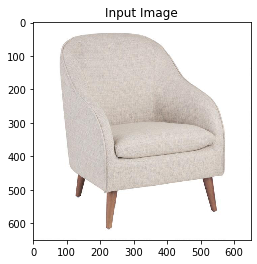

In [0]:
pic = plt.imread(impath)/255  # dividing by 255 to bring the pixel values between 0 and 1
print(pic.shape)
plt.imshow(pic)
plt.title("Input Image")

In [0]:
pic_n = pic.reshape(pic.shape[0]*pic.shape[1], pic.shape[2])
pic_n.shape

(422500, 3)

In [0]:
from sklearn.cluster import KMeans
kval = 3
kmeans = KMeans(n_clusters=kval, random_state=0).fit(pic_n)
pic2show = kmeans.cluster_centers_[kmeans.labels_]

Text(0.5, 1.0, 'Segmented Image when K = 3')

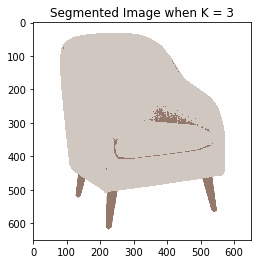

In [0]:
cluster_pic = pic2show.reshape(pic.shape[0], pic.shape[1], pic.shape[2])
plt.imshow(cluster_pic)
plt.title('Segmented Image when K = %i' % kval)

**K-Mean Clustering**

using opencv module

In [0]:
original_image = cv2.imread(impath)

In [0]:
img=cv2.cvtColor(original_image,cv2.COLOR_BGR2RGB)

In [0]:
vectorized = np.float32(img.reshape((-1,3)))

In [0]:
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)

In [0]:
K = 5
attempts=10
ret,label,center=cv2.kmeans(vectorized,K,None,criteria,attempts,cv2.KMEANS_PP_CENTERS)

In [0]:
center = np.uint8(center)

In [0]:
res = center[label.flatten()]
result_image = res.reshape((img.shape))

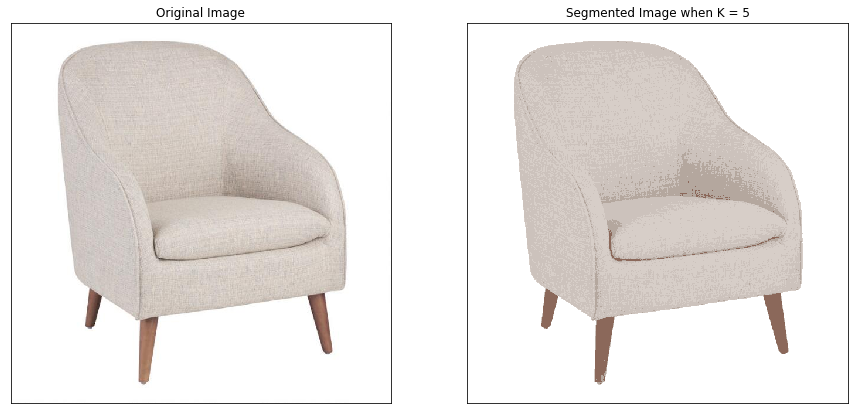

In [0]:
figure_size = 15
plt.figure(figsize=(figure_size,figure_size))
plt.subplot(1,2,1),plt.imshow(img)
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(1,2,2),plt.imshow(result_image)
plt.title('Segmented Image when K = %i' % K), plt.xticks([]), plt.yticks([])
plt.show()